### Aplicación de Algoritmos - Datos de salud de pacientes con demencia

# Regresión

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, root_mean_squared_error
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Lectura de datos
df = pd.read_csv('./datasources/dementia_patients_health_data.csv')
df_dementia_yes = df[df['dementia'] == 'Yes'].copy()
df_dementia_yes.drop('dementia', axis=1, inplace=True)

# Transformación de variables (categóticas a numéricas)
cat_to_num_dict = {
    'prescription': {'prescription': {'Galantamine': 1, 'Donepezil': 2, 'Memantine': 3, 'Rivastigmine': 4}},
    'education_level': {'education_level': {'Secondary School': 0, 'No School': 1, 'Primary School': 2, 'Diploma/Degree': 3}},
    'dominant_hand': {'dominant_hand': {'Right': 0, 'Left': 1}},
    'gender': {'gender': {'Male': 0, 'Female': 1}},
    'family_history': {'family_history': {'No': 0, 'Yes': 1}},
    'smoking_status': {'smoking_status': {'Current Smoker': 0, 'Former Smoker': 1, 'Never Smoked': 2}},
    'apoe_4': {'apoe_4': {'Negative': 0, 'Positive': 1}},
    'physical_activity': {'physical_activity': {'Moderate Activity': 0, 'Mild Activity': 1, 'Sedentary': 2}},
    'depression_status': {'depression_status': {'No': 0, 'Yes': 1}},
    'medication_history': {'medication_history': {'No': 0, 'Yes': 1}},
    'nutrition_diet': {'nutrition_diet': {'Low-Carb Diet': 0, 'Balanced Diet': 1, 'Mediterranean Diet': 2}},
    'sleep_quality': {'sleep_quality': {'Poor': 0, 'Good': 1}},
    'chronic_health_conditions': {'chronic_health_conditions': {'Heart Disease': 1, 'Hypertension': 2, 'Diabetes': 3}},
    'diabetic': {'diabetic': {'Yes': 1, 'No': 0}}
}

df_dementia_yes['prescription'].fillna(0, inplace=True) # Se le asigna valor 0 a los NaN (pacientes que no tienen ninguna prescripción)
df_dementia_yes['dosage_in_mg'].fillna(0, inplace=True) # Se le asigna valor 0 a los NaN (pacientes que no toman dosis)
df_dementia_yes['chronic_health_conditions'].fillna(0, inplace=True) # Se le asigna valor 0 a los NaN (pacientes que no tienen ninguna condición crónica)

for col in cat_to_num_dict.keys():
    df_dementia_yes.replace(cat_to_num_dict[col], inplace=True)

# Dividir el total de datos en variables predictoras y objetivo
X = df_dementia_yes.drop(columns=['age'])
Y = df_dementia_yes['age']

x_train_base, x_test, y_train_base, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Dividir datos parciales en variables predictorias y objetivo (utilizando solo top five features importance)
top_five_features_importance = ['alcohol_level','weight', 'body_temperature', 'mri_delay', 'heart_rate', 'blood_oxygen_level']

x_train_important_features = x_train_base[top_five_features_importance]
x_test_important_features = x_test[top_five_features_importance]
y_train_important_features = y_train_base
y_test_important_features = y_test

# Definir parámetros de GridSearchCV
cv = 10
scoring = 'neg_mean_squared_error'

# Diccionario para almacenar los mejores hiperparámetros para cada modelo
best_params = {
    'random_forest_regressor': {},
    'SVR': {},
    'decision_tree_regressor': {},
    'logistic_regression_multinomial': {},
    'SVR_adaboost': {},
    'XGB_regressor': {}
}

# Diccionario para almacenar métricas
metricas = {
    'random_forest_regressor': {'total_data': {}, 'partial_data': {}},
    'SVR': {'total_data': {}, 'partial_data': {}},
    'decision_tree_regressor': {'total_data': {}, 'partial_data': {}},
    'logistic_regression_multinomial': {'total_data': {}, 'partial_data': {}},
    'SVR_adaboost': {'total_data': {}, 'partial_data': {}},
    'XGB_regressor': {'total_data': {}, 'partial_data': {}}
}


FileNotFoundError: [Errno 2] No such file or directory: './datasources/dementia_patients_health_data.csv'

## Regresión utilizando **DecisionTreeRegressor** & **GridSearchCV**

### Utilizando el total de los datos.

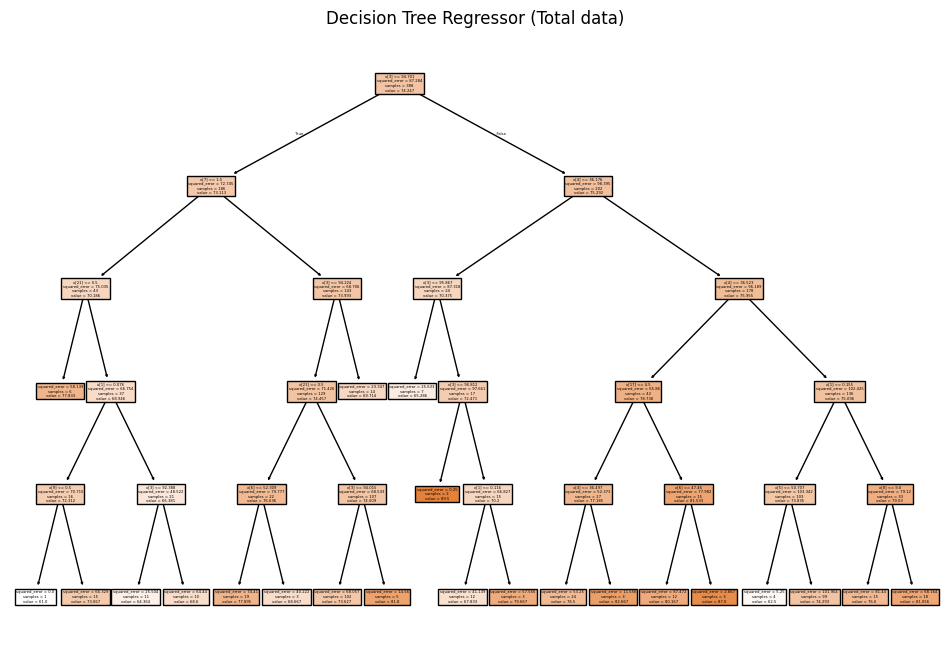

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt_regressor = DecisionTreeRegressor()

param_grid = {
    'random_state': [2],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
"""
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           scoring=scoring, cv=cv, n_jobs=-1)
grid_search.fit(x_train_base, y_train_base)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""
# Mejores parámetros: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 2}
# Mejor puntuación: -101.56081077182657

# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['decision_tree_regressor']['total_data'] = {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 2}
best_model_dec_tree_1 = DecisionTreeRegressor(**best_params['decision_tree_regressor']['total_data'])
best_model_dec_tree_1.fit(x_train_base, y_train_base)

y_pred = best_model_dec_tree_1.predict(x_test)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['decision_tree_regressor']['total_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}

#print(metricas['decision_tree_regressor'])

# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(best_model_dec_tree_1, filled=True)
plt.title("Decision Tree Regressor (Total data)")
plt.show()






### Utilizando solo el top five de atributos obtenidos a partir de feature importance.

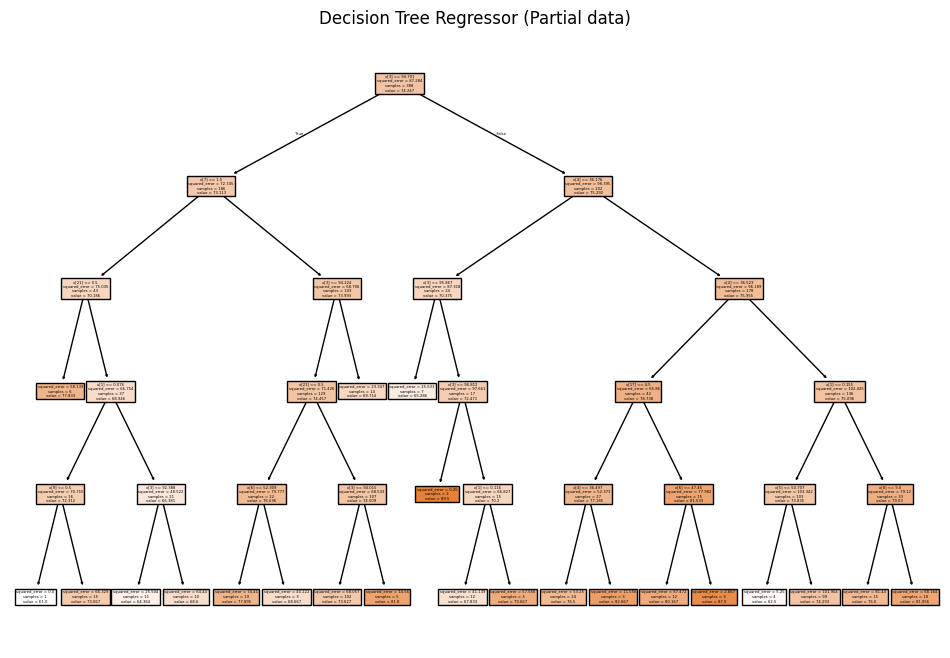

In [ ]:
dt_regressor = DecisionTreeRegressor()

param_grid = {
    'random_state': [2],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

"""
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           scoring=scoring, cv=cv, n_jobs=-1)
grid_search.fit(x_train_important_features, y_train_important_features)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""
# Mejores parámetros: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 15, 'random_state': 2}
# Mejor puntuación: -95.6751012145749

# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['decision_tree_regressor']['partial_data'] = {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 15, 'random_state': 2}
best_model_dec_tree_2 = DecisionTreeRegressor(**best_params['decision_tree_regressor']['partial_data'])
best_model_dec_tree_2.fit(x_train_important_features, y_train_important_features)

y_pred = best_model_dec_tree_2.predict(x_test_important_features)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['decision_tree_regressor']['partial_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}

#print(metricas['decision_tree_regressor'])

# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(best_model_dec_tree_1, filled=True)
plt.title("Decision Tree Regressor (Partial data)")
plt.show()


## Regresión utilizando **LogisticRegression Multinomial** & **GridSearchCV**

### Utilizando el total de los datos.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Escalado de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train_base)
df_scaled = pd.DataFrame(df_scaled, columns=x_train_base.columns)

# Dividir datos en variables predictoras y objetivo
x_train = df_scaled
y_train = y_train_base

model = LogisticRegression()

param_grid = {
    'random_state': [2],
    'multi_class': ['multinomial'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 400, 600, 1000],
    'max_iter': [10, 50, 75, 100, 200, 300, 500, 800, 1000, 1250, 15000, 20000],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l2'],
    'tol': [1e-4, 1e-3, 1e-2],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced']
}

"""
# Entrenamiento utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""

# Mejores parámetros: {'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 2, 'solver': 'lbfgs', 'tol': 0.001}
# Mejor puntuación: -141.0154845154845

# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['logistic_regression_multinomial']['total_data'] = {'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 2, 'solver': 'lbfgs', 'tol': 0.001}
#best_model_log_reg_1 = LogisticRegression(**best_params['logistic_regression_multinomial']['total_data'])
best_model_log_reg_1 = LogisticRegression(**best_params['logistic_regression_multinomial']['total_data'])
best_model_log_reg_1.fit(x_train, y_train)

y_pred = best_model_log_reg_1.predict(x_test)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['logistic_regression_multinomial']['total_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


### Utilizando solo el top five de atributos obtenidos a partir de feature importance.

In [ ]:
# Escalado de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train_important_features)
df_scaled = pd.DataFrame(df_scaled, columns=x_train_important_features.columns)

# Dividir datos en variables predictoras y objetivo
x_train = df_scaled
y_train = y_train_important_features

model = LogisticRegression(random_state=42, multi_class='multinomial')

param_grid = {
    'random_state': [2],
    'multi_class': ['multinomial'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 400, 600, 1000],
    'max_iter': [10, 50, 75, 100, 200, 300, 500, 800, 1000, 1250, 15000, 20000],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l2'],
    'tol': [1e-4, 1e-3, 1e-2],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced']
}

"""
# Entrenamiento utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Mejores parámetros: {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 2, 'solver': 'sag', 'tol': 0.01}
# Mejor puntuación: -124.16350316350318


"""
# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['logistic_regression_multinomial']['partial_data'] = {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 2, 'solver': 'sag', 'tol': 0.01}
best_model_log_reg_2 = LogisticRegression(**best_params['logistic_regression_multinomial']['partial_data'])
best_model_log_reg_2.fit(x_train, y_train)

y_pred = best_model_log_reg_2.predict(x_test_important_features)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['logistic_regression_multinomial']['partial_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}



## Regresión utilizando **SVR** & **GridSearchCV**

### Utilizando el total de los datos.

In [ ]:
from sklearn.svm import SVR

model = SVR()

param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10, 100, 200],
    'epsilon': [0.1, 0.2, 1, 2, 4, 8, 50],
    'gamma': ['scale', 0.1, 1, 1.5, 2, 4, 8]
}
"""
# Entrenamiento utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid_search.fit(x_train_base, y_train_base)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""

# Mejores parámetros: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
# Mejor puntuación: -87.27010184470315


# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['SVR']['total_data'] = {'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
best_model_svr_1 = SVR(**best_params['SVR']['total_data'])
best_model_svr_1.fit(x_train_base, y_train_base)

y_pred = best_model_svr_1.predict(x_test)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['SVR']['total_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


### Utilizando solo el top five de atributos obtenidos a partir de feature importance.

In [ ]:
model = SVR()

param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10, 100, 200],
    'epsilon': [0.1, 0.2, 1, 2, 4, 8, 50],
    'gamma': ['scale', 0.1, 1, 1.5, 2, 4, 8]
}
"""
# Entrenamiento utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid_search.fit(x_train_important_features, y_train_important_features)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


# Mejores parámetros: {'C': 1, 'epsilon': 8, 'gamma': 8, 'kernel': 'rbf'}
# Mejor puntuación: -87.56939204929172

"""

# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['SVR']['partial_data'] = {'C': 1, 'epsilon': 8, 'gamma': 8, 'kernel': 'rbf'}
best_model_svr_2 = SVR(**best_params['SVR']['partial_data'])
best_model_svr_2.fit(x_train_important_features, y_train_important_features)

y_pred = best_model_svr_2.predict(x_test_important_features)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['SVR']['partial_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}



---

# Métodos de ensamble

## Regresión utilizando **RandomForestRegressor** & **GridSearchCV**

### Utilizando el total de los datos.

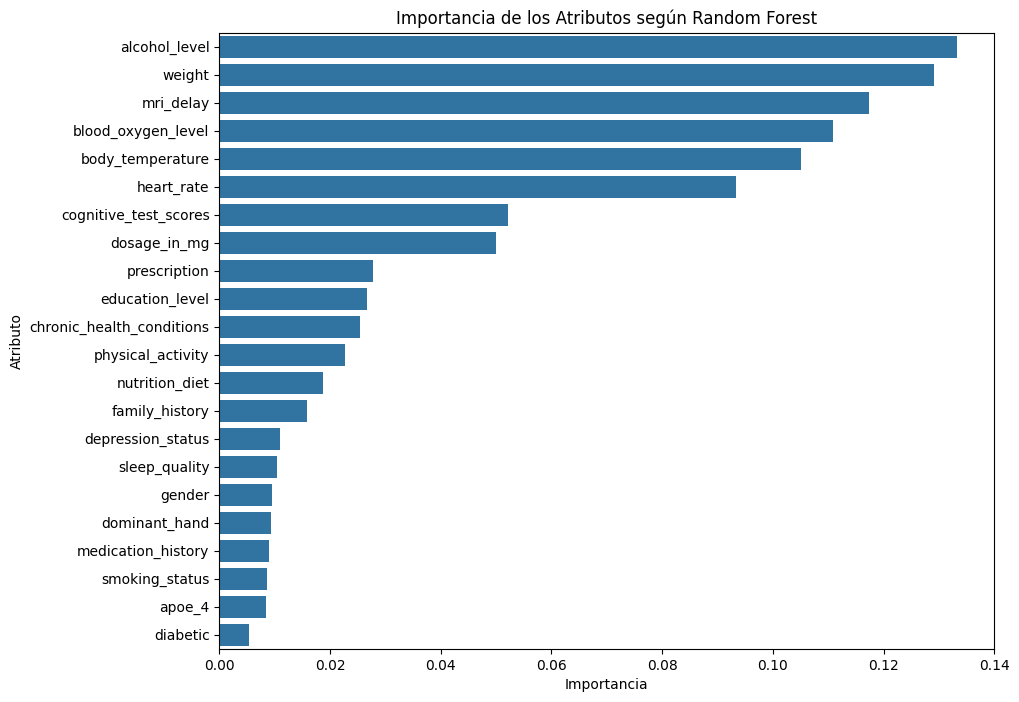

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


# Definir el modelo
model = RandomForestRegressor()
param_grid = {
    'random_state': [42],
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'min_samples_split': [2, 5, 10, 0.1],
    'min_samples_leaf': [1, 2, 4, 0.1],
    'max_leaf_nodes': [None, 10, 20, 30],
    'bootstrap': [True, False]
}
"""
# Entrenamiento utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid_search.fit(x_train_base, y_train_base)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Extraer la importancia de los atributos para posterior análisis y utilización.
feature_importance = grid_search.best_estimator_.feature_importances_

# Crear un DataFrame para mostrar las importancias de los atributos
importance_df = pd.DataFrame({
    'Atributo': X.columns,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Atributo', data=importance_df)
plt.title('Importancia de los Atributos según Random Forest')
plt.show()

# Extraer el primer árbol del bosque
single_tree = grid_search.best_estimator_.estimators_[0]

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Visualización del Árbol mejor estimador del Random Forest")
plt.show()

# Mejores parámetros: {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}
# Mejor puntuación: -86.12915471707153

"""
# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['random_forest_regressor']['total_data'] = {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}

best_model_random_forest_1 = RandomForestRegressor(**best_params['random_forest_regressor']['total_data'])

best_model_random_forest_1.fit(x_train_base, y_train_base)


# Extraer la importancia de los atributos para posterior análisis y utilización.
feature_importance = best_model_random_forest_1.feature_importances_

# Crear un DataFrame para mostrar las importancias de los atributos
importance_df = pd.DataFrame({
    'Atributo': X.columns,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Atributo', data=importance_df)
plt.title('Importancia de los Atributos según Random Forest')
plt.show() 

y_pred = best_model_random_forest_1.predict(x_test)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['random_forest_regressor']['total_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


### Utilizando solo el top five de atributos obtenidos a partir de feature importance.

In [ ]:
# Definir el modelo
model = RandomForestRegressor(random_state=42)
param_grid = {
    'random_state': [42],
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'min_samples_split': [2, 5, 10, 0.1],
    'min_samples_leaf': [1, 2, 4, 0.1],
    'max_leaf_nodes': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

"""
# Entrenamiento utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid_search.fit(x_train_important_features, y_train_important_features)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Extraer el primer árbol del bosque
single_tree = grid_search.best_estimator_.estimators_[0]

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=x_train_important_features.columns, filled=True, rounded=True, fontsize=10)
plt.title("Visualización del Árbol mejor estimador del Random Forest")
plt.show()
"""
# Mejores parámetros: {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}
# Mejor puntuación: -86.01987930418353


# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['random_forest_regressor']['partial_data'] = {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}
best_model_random_forest_2 = RandomForestRegressor(**best_params['random_forest_regressor']['partial_data'])

best_model_random_forest_2.fit(x_train_important_features, y_train_important_features)

y_pred = best_model_random_forest_2.predict(x_test_important_features)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['random_forest_regressor']['partial_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


## Regresión utilizando **Adaboost / SVR** & **GridSearchCV**

### Utilizando el total de los datos.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

base_model = SVR(**best_params['SVR']['total_data'])
model = AdaBoostRegressor(estimator=base_model)

param_grid = {
    'random_state': [2],
    'n_estimators': [1, 10, 25, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.75, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

"""
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)
grid_search.fit(x_train_base, y_train_base)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""
# Mejores parámetros: {'learning_rate': 0.75, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 2}
# Mejor puntuación: -87.15360137768971


# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['SVR_adaboost']['total_data'] = {'estimator': base_model,'learning_rate': 0.75, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 2}
best_model_svr_adaboost_1 = AdaBoostRegressor(**best_params['SVR_adaboost']['total_data'])

best_model_svr_adaboost_1.fit(x_train_base, y_train_base)

y_pred = best_model_svr_adaboost_1.predict(x_test)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['SVR_adaboost']['total_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}



### Utilizando solo el top five de atributos obtenidos a partir de feature importance.

In [ ]:
base_model = SVR(**best_params['SVR']['partial_data'])
model = AdaBoostRegressor(estimator=base_model)

param_grid = {
    'random_state': [2],
    'n_estimators': [1, 10, 25, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.75, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

"""
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)
grid_search.fit(x_train_important_features, y_train_important_features)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""
# Mejores parámetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 25, 'random_state': 2}
# Mejor puntuación: -87.5270799632926

# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['SVR_adaboost']['partial_data'] = {'estimator': base_model, 'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 25, 'random_state': 2}
best_model_svr_adaboost_2 = AdaBoostRegressor(**best_params['SVR_adaboost']['partial_data'])

best_model_svr_adaboost_2.fit(x_train_important_features, y_train_important_features)

y_pred = best_model_svr_adaboost_2.predict(x_test_important_features)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['SVR_adaboost']['partial_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


## Regresión utilizando **XGBRegressor / SVR** & **GridSearchCV**

### Utilizando el total de los datos.

In [ ]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor()

param_grid = {
    'random_state': [42],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1.0, 10.0],
    'min_child_weight': [1, 5],
    'eval_metric': [mean_squared_error],
}

"""
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1)
grid_search.fit(x_train_base, y_train_base)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Mejores parámetros: {'colsample_bytree': 1.0, 'eval_metric': <function mean_squared_error at 0x000001DC82C40EA0>, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 1.0}
# Mejor puntuación: -85.14480001915156



"""
# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['XGB_regressor']['total_data'] = {'colsample_bytree': 1.0, 'eval_metric': mean_squared_error, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 1.0}
best_model_xgbregressor_1 = XGBRegressor(**best_params['XGB_regressor']['total_data'])

best_model_xgbregressor_1.fit(x_train_base, y_train_base)

y_pred = best_model_xgbregressor_1.predict(x_test)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['XGB_regressor']['total_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


### Utilizando solo el top five de atributos obtenidos a partir de feature importance.

In [ ]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor()

param_grid = {
    'random_state': [42],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1.0, 10.0],
    'min_child_weight': [1, 5],
    'eval_metric': [mean_squared_error],
}
"""
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1)
grid_search.fit(x_train_important_features, y_train_important_features)

# Mejor modelo y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""
# Mejores parámetros: {'colsample_bytree': 1.0, 'eval_metric': <function mean_squared_error at 0x000001DC82C40EA0>, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.8}
# Mejor puntuación: -84.9198440462815

# Guardamos los mejores hiperparámetros obtenidos y entrenamos el modelo.
best_params['XGB_regressor']['partial_data'] = {'colsample_bytree': 1.0, 'eval_metric': mean_squared_error, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.8}
best_model_xgbregressor_2 = XGBRegressor(**best_params['XGB_regressor']['partial_data'])

best_model_xgbregressor_2.fit(x_train_important_features, y_train_important_features)

y_pred = best_model_xgbregressor_2.predict(x_test_important_features)
y_pred = np.floor(y_pred).astype(int) # Tomo solo la parte entera para medir el score

m_metric = float(max_error(y_test, y_pred))
mae_metric = float(mean_absolute_error(y_test, y_pred))
mse_metric = float(mean_squared_error(y_test, y_pred))
rmse_metric = float(root_mean_squared_error(y_test, y_pred))

metricas['XGB_regressor']['partial_data'] = {
    'M': m_metric,
    'MAE': mae_metric,
    'MSE': mse_metric,
    'RMSE': rmse_metric
}


In [ ]:
# Convertir el diccionario a un DataFrame para facilitar la manipulación
data = []
for model, datasets in metricas.items():
    for dataset_type, metrics in datasets.items():
        data.append([model, dataset_type, metrics['M'], metrics['MAE'], metrics['MSE'], metrics['RMSE']])

df_metrics = pd.DataFrame(data, columns=['Model', 'Dataset', 'M', 'MAE', 'MSE', 'RMSE'])

df_metrics['Model'] = df_metrics['Model'].replace({
    'decision_tree_regressor': 'DecisionTreeRegressor',
    'SVR': 'SVR_RBF',
    'logistic_regression_multinomial': 'LogisticRegressionMultinomial',
    'random_forest_regressor': 'RandomForestRegressor',
    'SVR_adaboost': 'SVR_RBF_Adaboost',
    'XGB_regressor': 'XGBRegressor'
})
pd.set_option('display.float_format', '{:.2f}'.format)
df_metrics

,Model,Dataset,M,MAE,MSE,RMSE
0,RandomForestRegressor,total_data,18.00,8.04,88.31,9.40
1,RandomForestRegressor,partial_data,20.00,8.28,94.38,9.72
2,SVR_RBF,total_data,16.00,7.98,86.16,9.28
3,SVR_RBF,partial_data,16.00,8.00,86.41,9.30
4,DecisionTreeRegressor,total_data,24.00,8.93,103.18,10.16
5,DecisionTreeRegressor,partial_data,25.00,8.76,121.40,11.02
6,LogisticRegressionMultinomial,total_data,29.00,11.38,180.64,13.44
7,LogisticRegressionMultinomial,partial_data,29.00,12.07,209.97,14.49
8,SVR_RBF_Adaboost,total_data,16.00,8.01,86.44,9.30
9,SVR_RBF_Adaboost,partial_data,16.00,8.00,86.41,9.30


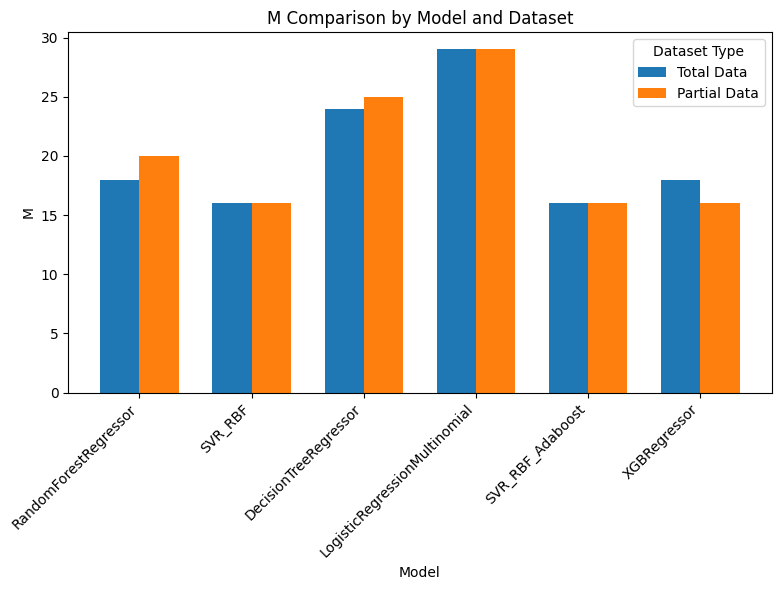

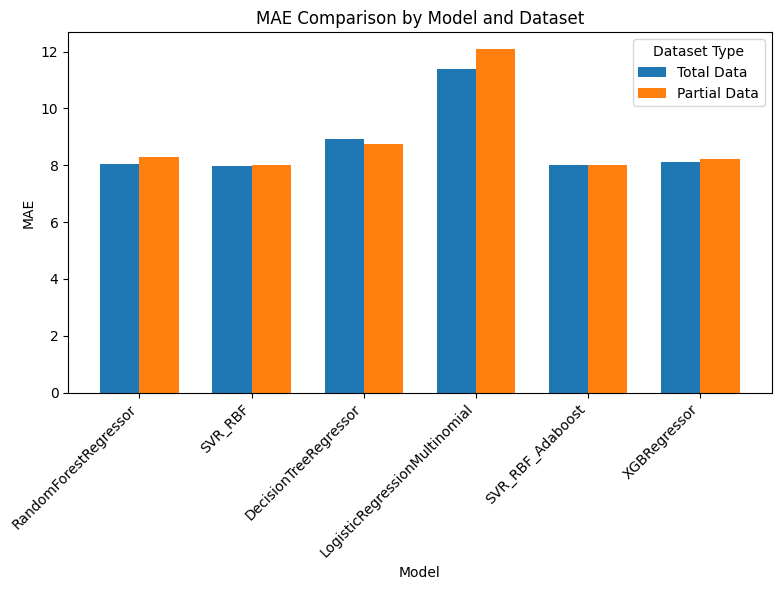

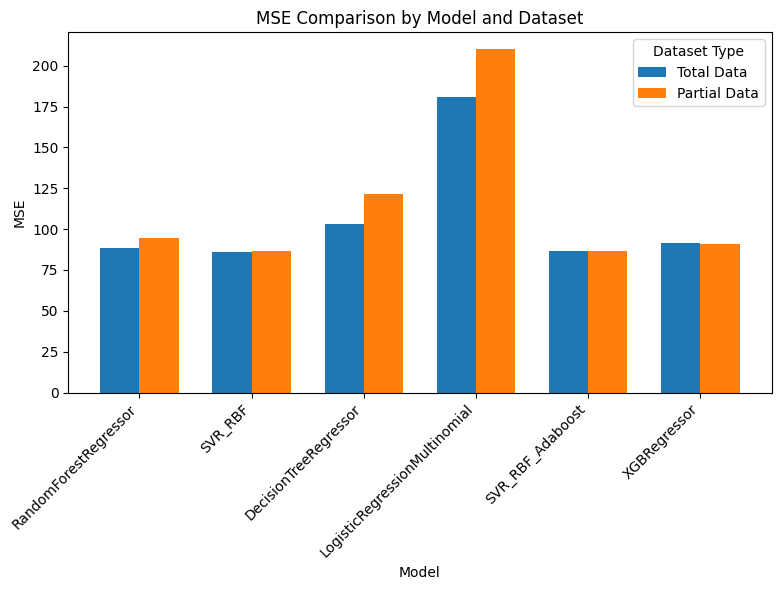

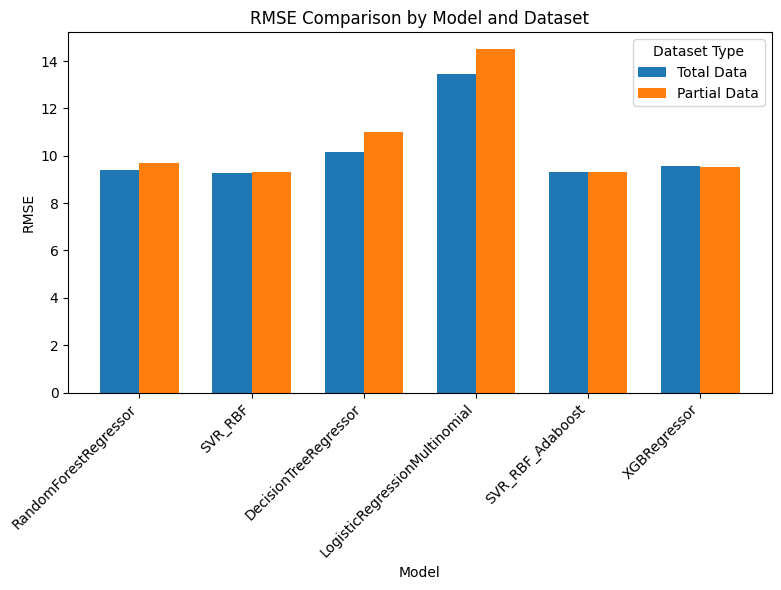

In [ ]:

# Crear gráfico de barras agrupadas para cada métrica en gráficos separados
metrics = ['M', 'MAE', 'MSE', 'RMSE']
x = np.arange(len(df_metrics['Model'].unique()))  # posiciones en x para cada modelo
width = 0.35  # ancho de las barras

for metric in metrics:
    plt.figure(figsize=(8, 6))
    total_data_values = df_metrics[df_metrics['Dataset'] == 'total_data'][metric]
    partial_data_values = df_metrics[df_metrics['Dataset'] == 'partial_data'][metric]
    
    # Crear las barras para total_data y partial_data
    plt.bar(x - width/2, total_data_values, width, label='Total Data')
    plt.bar(x + width/2, partial_data_values, width, label='Partial Data')

    # Etiquetas y ajustes
    plt.title(f"{metric} Comparison by Model and Dataset")
    plt.xticks(ticks=x, labels=df_metrics['Model'].unique(), rotation=45, ha='right')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.legend(title='Dataset Type')
    plt.tight_layout()
    plt.show()

In [ ]:
x_test_loc = x_test.iloc[4:7]
x_test_loc_partial = x_test_important_features.iloc[4:7]
y_pred_loc = y_pred[4:7]

# np.floor(y_pred).astype(int)
predictions = {
    ('DecisionTreeRegressor', 'total_data', 'predicted'): np.floor(best_model_dec_tree_1.predict(x_test_loc)).astype(int),
    ('DecisionTreeRegressor', 'total_data', 'actual'): y_pred_loc,
    ('DecisionTreeRegressor', 'partial_data', 'predicted'): np.floor(best_model_dec_tree_2.predict(x_test_loc_partial)).astype(int),  # Supón que usas el mismo valor para 'partial_data' por ejemplo
    ('DecisionTreeRegressor', 'partial_data', 'actual'): y_pred_loc,
    ('SVR_RBF', 'total_data', 'predicted'): np.floor(best_model_svr_1.predict(x_test_loc)).astype(int),
    ('SVR_RBF', 'total_data', 'actual'): y_pred_loc,
    ('SVR_RBF', 'partial_data', 'predicted'): np.floor(best_model_svr_2.predict(x_test_loc_partial)).astype(int),  # Supón que usas el mismo valor para 'partial_data' por ejemplo
    ('SVR_RBF', 'partial_data', 'actual'): y_pred_loc,
    ('LogisticRegressionMultinomial', 'total_data', 'predicted'): np.floor(best_model_log_reg_1.predict(x_test_loc)).astype(int),
    ('LogisticRegressionMultinomial', 'total_data', 'actual'): y_pred_loc,
    ('LogisticRegressionMultinomial', 'partial_data', 'predicted'): np.floor(best_model_log_reg_2.predict(x_test_loc_partial)).astype(int),  # Supón que usas el mismo valor para 'partial_data' por ejemplo
    ('LogisticRegressionMultinomial', 'partial_data', 'actual'): y_pred_loc,
    ('RandomForestRegressor', 'total_data', 'predicted'): np.floor(best_model_random_forest_1.predict(x_test_loc)).astype(int),
    ('RandomForestRegressor', 'total_data', 'actual'): y_pred_loc,
    ('RandomForestRegressor', 'partial_data', 'predicted'): np.floor(best_model_random_forest_2.predict(x_test_loc_partial)).astype(int),  # Supón que usas el mismo valor para 'partial_data' por ejemplo
    ('RandomForestRegressor', 'partial_data', 'actual'): y_pred_loc,
    ('SVR_RBF_Adaboost', 'total_data', 'predicted'): np.floor(best_model_svr_adaboost_1.predict(x_test_loc)).astype(int),
    ('SVR_RBF_Adaboost', 'total_data', 'actual'): y_pred_loc,
    ('SVR_RBF_Adaboost', 'partial_data', 'predicted'): np.floor(best_model_svr_adaboost_2.predict(x_test_loc_partial)).astype(int),  # Supón que usas el mismo valor para 'partial_data' por ejemplo
    ('SVR_RBF_Adaboost', 'partial_data', 'actual'): y_pred_loc,
    ('XGBRegressor', 'total_data', 'predicted'): np.floor(best_model_xgbregressor_1.predict(x_test_loc)).astype(int),
    ('XGBRegressor', 'total_data', 'actual'): y_pred_loc,
    ('XGBRegressor', 'partial_data', 'predicted'): np.floor(best_model_xgbregressor_2.predict(x_test_loc_partial)).astype(int),  # Supón que usas el mismo valor para 'partial_data' por ejemplo
    ('XGBRegressor', 'partial_data', 'actual'): y_pred_loc,
}
def colorize(value, actual):
    result = []
    for v, a in zip(value, actual):  # Recorre los elementos de las predicciones y los valores reales
        if v == a:
            result.append(f"\033[92m{v}\033[0m")  # Verde si coincide
        else:
            result.append(f"\033[91m{v}\033[0m")  # Rojo si no coincide
    return " ".join(result)

# DecisionTreeRegressor
total_pred = predictions[('DecisionTreeRegressor', 'total_data', 'predicted')]
total_actual = predictions[('DecisionTreeRegressor', 'total_data', 'actual')]
print(f"DecisionTreeRegressor, total data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# SVR_RBF
total_pred = predictions[('SVR_RBF', 'total_data', 'predicted')]
total_actual = predictions[('SVR_RBF', 'total_data', 'actual')]
print(f"SVR_RBF, total data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# LogisticRegressionMultinomial
total_pred = predictions[('LogisticRegressionMultinomial', 'total_data', 'predicted')]
total_actual = predictions[('LogisticRegressionMultinomial', 'total_data', 'actual')]
print(f"LogisticRegressionMultinomial, total data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# RandomForestRegressor
total_pred = predictions[('RandomForestRegressor', 'total_data', 'predicted')]
total_actual = predictions[('RandomForestRegressor', 'total_data', 'actual')]
print(f"RandomForestRegressor, total data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# SVR_RBF_Adaboost
total_pred = predictions[('SVR_RBF_Adaboost', 'total_data', 'predicted')]
total_actual = predictions[('SVR_RBF_Adaboost', 'total_data', 'actual')]
print(f"SVR_RBF_Adaboost, total data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# XGBRegressor
total_pred = predictions[('XGBRegressor', 'total_data', 'predicted')]
total_actual = predictions[('XGBRegressor', 'total_data', 'actual')]
print(f"XGBRegressor, total data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")

DecisionTreeRegressor, total data.
Prediccion:     74 68 74
Valor esperado: [74 75 73]

SVR_RBF, total data.
Prediccion:     74 74 74
Valor esperado: [74 75 73]

LogisticRegressionMultinomial, total data.
Prediccion:     89 75 75
Valor esperado: [74 75 73]

RandomForestRegressor, total data.
Prediccion:     73 73 75
Valor esperado: [74 75 73]

SVR_RBF_Adaboost, total data.
Prediccion:     74 74 74
Valor esperado: [74 75 73]

XGBRegressor, total data.
Prediccion:     74 72 73
Valor esperado: [74 75 73]



In [ ]:

# DecisionTreeRegressor
total_pred = predictions[('DecisionTreeRegressor', 'partial_data', 'predicted')]
total_actual = predictions[('DecisionTreeRegressor', 'partial_data', 'actual')]
print(f"DecisionTreeRegressor, partial data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# SVR_RBF
total_pred = predictions[('SVR_RBF', 'partial_data', 'predicted')]
total_actual = predictions[('SVR_RBF', 'partial_data', 'actual')]
print(f"SVR_RBF, partial data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# LogisticRegressionMultinomial
total_pred = predictions[('LogisticRegressionMultinomial', 'partial_data', 'predicted')]
total_actual = predictions[('LogisticRegressionMultinomial', 'partial_data', 'actual')]
print(f"LogisticRegressionMultinomial, partial data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# RandomForestRegressor
total_pred = predictions[('RandomForestRegressor', 'partial_data', 'predicted')]
total_actual = predictions[('RandomForestRegressor', 'partial_data', 'actual')]
print(f"RandomForestRegressor, partial data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# SVR_RBF_Adaboost
total_pred = predictions[('SVR_RBF_Adaboost', 'partial_data', 'predicted')]
total_actual = predictions[('SVR_RBF_Adaboost', 'partial_data', 'actual')]
print(f"SVR_RBF_Adaboost, partial data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")
# XGBRegressor
total_pred = predictions[('XGBRegressor', 'partial_data', 'predicted')]
total_actual = predictions[('XGBRegressor', 'partial_data', 'actual')]
print(f"XGBRegressor, partial data.")
print(f"Prediccion:     {colorize(total_pred, total_actual)}")
print(f"Valor esperado: {total_actual}\n")

DecisionTreeRegressor, partial data.
Prediccion:     72 72 72
Valor esperado: [74 75 73]

SVR_RBF, partial data.
Prediccion:     74 74 74
Valor esperado: [74 75 73]

LogisticRegressionMultinomial, partial data.
Prediccion:     89 75 75
Valor esperado: [74 75 73]

RandomForestRegressor, partial data.
Prediccion:     74 75 73
Valor esperado: [74 75 73]

SVR_RBF_Adaboost, partial data.
Prediccion:     74 74 74
Valor esperado: [74 75 73]

XGBRegressor, partial data.
Prediccion:     74 75 73
Valor esperado: [74 75 73]



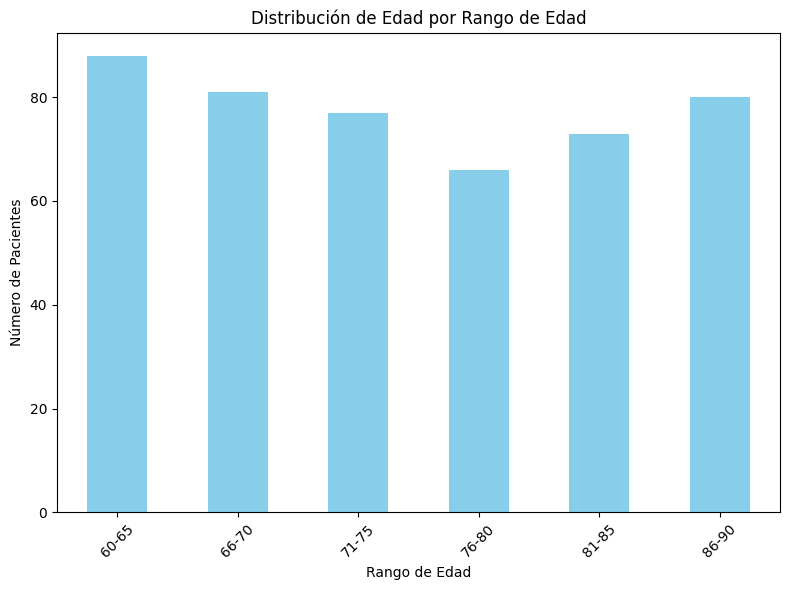

In [ ]:
#df_dementia_yes['age'].describe()

# Definir los rangos de edad
bins = [60, 65, 70, 75, 80, 85, 90]  # Definir los rangos de edad
labels = ['60-65', '66-70', '71-75', '76-80', '81-85', '86-90']  # Etiquetas para los rangos

# Crear una nueva columna en el DataFrame con los rangos de edad
df_age_groups = df_dementia_yes.copy()
df_age_groups['age_group'] = pd.cut(df_age_groups['age'], bins=bins, labels=labels, right=True)

# Contar la cantidad de personas en cada rango de edad
age_group_counts = df_age_groups['age_group'].value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Edad por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Clasificación
En base a parámetros relacionados con el estilo de vida, la genética y resultados médicos, establecer si el paciente tiene demencia.
## Algoritmos a implementar
- Bosques Aleatorios
- Máquinas de Soporte Vectorial
- Regresión Logística

In [3]:
import pandas as pd
import re
import warnings
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [5]:
# Conjunto de Datos
df = pd.read_csv("C:/Users/USER/Downloads/dementia_patients_health_data.csv")
# Copia del conjunto original para la aplicación de algoritmos
df_prueba = df.copy()

# Función para renombrar columnas
def to_snake_case(input_string):
    """
    Function to convert words to snake case.
    Replace spaces and hyphens with underscores and remove special characters.
    """
    # Replace hyphens with underscores
    clean_string = re.sub(r'-', '_', input_string)
    # Replace special characters with nothing (i.e., remove them)
    clean_string = re.sub(r'[^a-zA-Z0-9\s_]', '', clean_string)
    # Replace spaces with underscores
    clean_string = re.sub(r'\s+', '_', clean_string)
    # Convert to lower case
    clean_string = clean_string.lower()
    return clean_string

renamed_columns = {
    'AlcoholLevel': 'alcohol_level',
    'HeartRate': 'heart_rate',
    'BloodOxygenLevel': 'blood_oxygen_level',
    'BodyTemperature': 'body_temperature',
}

# Renombrado de columnas
df_prueba.rename(columns=renamed_columns, inplace=True)
df_prueba.columns = [to_snake_case(col) for col in df_prueba.columns]
#print(f"Columnas renombradas:\n{df_prueba.columns.to_list()}\n")

### Transformación de variables (categóticas a numéricas)
Se tranforman todas la variables a excepción de 'prescription' y 'dosage_in_mg' ya que no se van a utilizar (fundamentado en el EDA)

In [ ]:
# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_prueba.replace({'education_level': {'Secondary School': 0, 'No School': 1, 'Primary School': 2, 'Diploma/Degree': 3}}, inplace=True)
df_prueba.replace({'dominant_hand': {'Right': 0, 'Left': 1}}, inplace=True)
df_prueba.replace({'gender': {'Male': 0, 'Female': 1}}, inplace=True)
df_prueba.replace({'family_history': {'No': 0, 'Yes': 1}}, inplace=True)
df_prueba.replace({'smoking_status': {'Current Smoker': 0, 'Former Smoker': 1, 'Never Smoked': 2}}, inplace=True)
df_prueba.replace({'apoe_4': {'Negative': 0, 'Positive': 1}}, inplace=True)
df_prueba.replace({'physical_activity': {'Moderate Activity': 0, 'Mild Activity': 1, 'Sedentary': 2}}, inplace=True)
df_prueba.replace({'depression_status': {'No': 0, 'Yes': 1}}, inplace=True)
df_prueba.replace({'medication_history': {'No': 0, 'Yes': 1}}, inplace=True)
df_prueba.replace({'nutrition_diet': {'Low-Carb Diet': 0, 'Balanced Diet': 1, 'Mediterranean Diet': 2}}, inplace=True)
df_prueba.replace({'sleep_quality': {'Poor': 0, 'Good': 1}}, inplace=True)
df_prueba.replace({'chronic_health_conditions': {'Heart Disease': 1, 'Hypertension': 2, 'Diabetes': 3}}, inplace=True)
# Se le asigna valor 0 a los NaN (pacientes que no tienen ninguna condición crónica)
df_prueba['chronic_health_conditions'].fillna(0, inplace=True)
pd.set_option('future.no_silent_downcasting', True)

### Selección de caracterísitcas más importantes

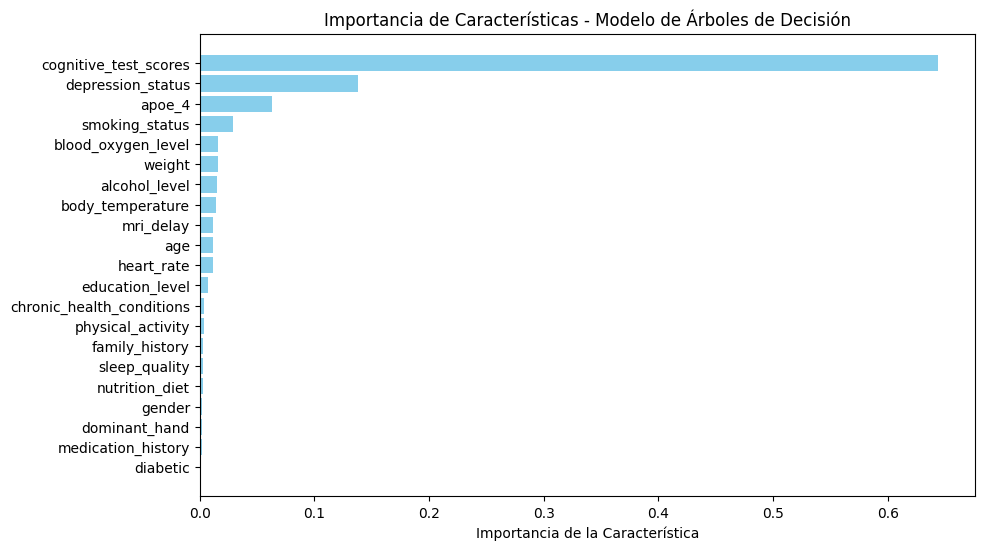

['cognitive_test_scores', 'depression_status', 'apoe_4', 'smoking_status', 'blood_oxygen_level', 'weight', 'alcohol_level', 'body_temperature', 'mri_delay', 'age', 'heart_rate', 'education_level']


In [7]:
X = df_prueba.drop(columns=['dementia', 'prescription', 'dosage_in_mg'])
Y = df_prueba['dementia']

modelo = RandomForestClassifier()
modelo.fit(X, Y)
importancias = modelo.feature_importances_

importancia_df = pd.DataFrame({
    'Caracteristica': X.columns,
    'Importancia': importancias
})

importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Caracteristica'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de Características - Modelo de Árboles de Decisión')
plt.gca().invert_yaxis()
plt.show()

# Obtener las primeras 12 características más importantes
top_12_caracteristicas = importancia_df['Caracteristica'].head(12).tolist()

print(top_12_caracteristicas)

En base a un análisis de importancia de características, se eligió trabajar con las 12 características principales

### Instancias a clasificar

In [8]:
# Selección de instancias
instancia_sin_demencia = df_prueba.drop(columns=['dementia', 'prescription', 'dosage_in_mg']).loc[996].tolist()
instancia_con_demencia = df_prueba.drop(columns=['dementia', 'prescription', 'dosage_in_mg']).loc[1].tolist()

instancia_sin_demencia_12 = df_prueba[top_12_caracteristicas].loc[996].tolist()
instancia_con_demencia_12 = df_prueba[top_12_caracteristicas].loc[1].tolist()

# Transformación del formato de las instancias en matriz
instancia_sin_demencia = np.array(instancia_sin_demencia).reshape(1, -1)
instancia_con_demencia = np.array(instancia_con_demencia).reshape(1, -1)

instancia_sin_demencia_12 = np.array(instancia_sin_demencia_12).reshape(1, -1)
instancia_con_demencia_12 = np.array(instancia_con_demencia_12).reshape(1, -1)

## Bosques Aleatorios (Random Forest)

### Preparación de los datos

In [ ]:
# Separación de variables
X = df_prueba.drop(columns=['dementia', 'prescription', 'dosage_in_mg']) # Características (eliminamos los atributos que no interesa evaluar)
Y = df_prueba['dementia'] # Etiqueta de salida

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalado de características
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

### Bosques Aleatorios

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mejores hiperparámetros encontrados:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Matriz de confusión:
 [[ 94   0]
 [  5 101]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        94
           1       1.00      0.95      0.98       106

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Exactitud del modelo:  0.975


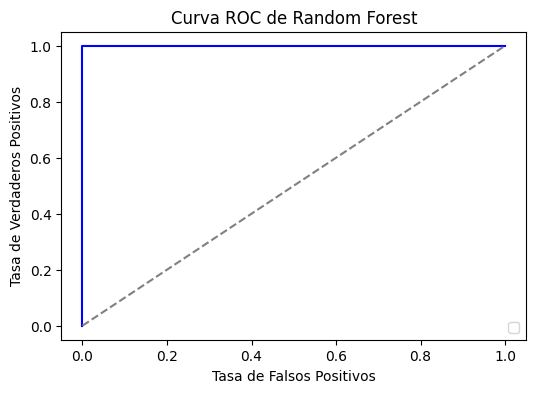

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# BOSQUE ALEATORIO
rdm_clf = RandomForestClassifier()

# Configuración de parámetros para el GridSearch
parametros_modelo_rdm_clf = {
    'n_estimators': [5, 10, 20, 50],
    'criterion' : ['gini', 'entropy'],
    'max_leaf_nodes' : [4, 8, 16],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight' : ['balanced', 'balanced_subsample'],
}

# Búsqueda de hiperparámetros con Validación Cruzada
modelo_rdm_clf = GridSearchCV(rdm_clf, parametros_modelo_rdm_clf, refit=True, cv=5, scoring='roc_auc')

# Ajuste del modelo con el conjunto de entrenamiento
modelo_rdm_clf.fit(X_train, Y_train)
print("Mejores hiperparámetros encontrados: ", modelo_rdm_clf.best_params_)


#EVALUACIÓN DEL MODELO
# Predicción sobre el conjunto de prueba
Y_prediccion_rdm_clf = modelo_rdm_clf.predict(X_test)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_rdm_clf))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_rdm_clf))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_rdm_clf))


# VISUALIZACIÓN
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_rdm_clf = modelo_rdm_clf.predict_proba(X_test)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_rdm_clf)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Random Forest")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_sin_demencia_escalada = escalador.transform(instancia_sin_demencia)
instancia_con_demencia_escalada = escalador.transform(instancia_con_demencia)

# Clasificación
clasificacion0_rdm_clf = modelo_rdm_clf.predict(instancia_sin_demencia_escalada)
print("Predicción de instancia 'sin demencia':", clasificacion0_rdm_clf)

clasificacion1_rdm_clf = modelo_rdm_clf.predict(instancia_con_demencia_escalada)
print("Predicción de instancia 'con demencia':", clasificacion1_rdm_clf)

### Bosques Aleatorios aplicando PCA

Matriz de confusión:
 [[90  4]
 [11 95]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        94
           1       0.96      0.90      0.93       106

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

Exactitud del modelo:  0.925


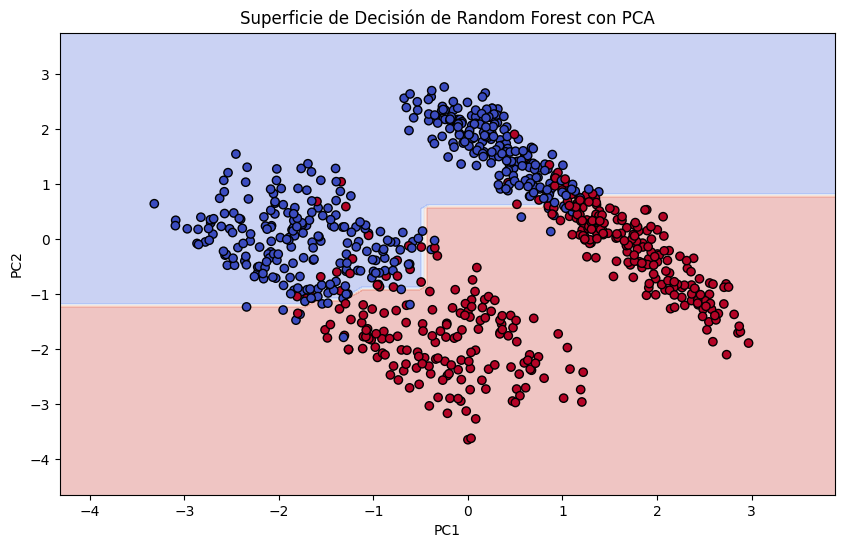

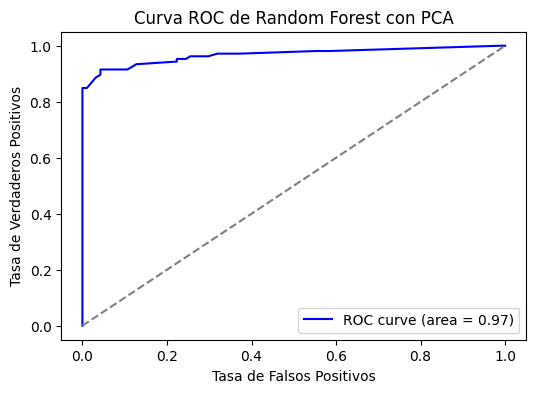

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Aplicación de PCA a las características de los conjuntos (de entrenamiento y prueba)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenamiento de Random Forest con PCA (con los mejores hiperparámetros encontrados anteriormente)
modelo_rdm_clf_pca = RandomForestClassifier(**modelo_rdm_clf.best_params_)
modelo_rdm_clf_pca.fit(X_train_pca, Y_train)

# Predicción sobre el conjunto de prueba
Y_prediccion_rdm_clf_pca = modelo_rdm_clf_pca.predict(X_test_pca)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_rdm_clf_pca))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_rdm_clf_pca))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_rdm_clf_pca))


# VISUALIZACIÓN
# Malla para graficar la superficie de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicciones sobre cada punto en la malla
Z = modelo_rdm_clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la superficie de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, edgecolor='k', cmap='coolwarm')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Superficie de Decisión de Random Forest con PCA")
plt.show()

# CURVA ROC
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_rdm_clf_pca = modelo_rdm_clf_pca.predict_proba(X_test_pca)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_rdm_clf_pca)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Random Forest con PCA")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_sin_demencia_escalada = escalador.transform(instancia_sin_demencia)
instancia_con_demencia_escalada = escalador.transform(instancia_con_demencia)

# Reducción de las instancias con PCA
instancia_sin_demencia_pca = pca.transform(instancia_sin_demencia_escalada)
instancia_con_demencia_pca = pca.transform(instancia_con_demencia_escalada)

# Clasificación
clasificacion0_rdm_clf_pca = modelo_rdm_clf_pca.predict(instancia_sin_demencia_pca)
print("Predicción de instancia 'sin demencia':", clasificacion0_rdm_clf_pca)

clasificacion1_rdm_clf_pca = modelo_rdm_clf_pca.predict(instancia_con_demencia_pca)
print("Predicción de instancia 'con demencia':", clasificacion1_rdm_clf_pca)


### Bosques Aleatorios aplicando importancia de características

Mejor hiperparámetro encontrado:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Matriz de confusión:
 [[ 94   0]
 [  0 106]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Exactitud del modelo:  1.0


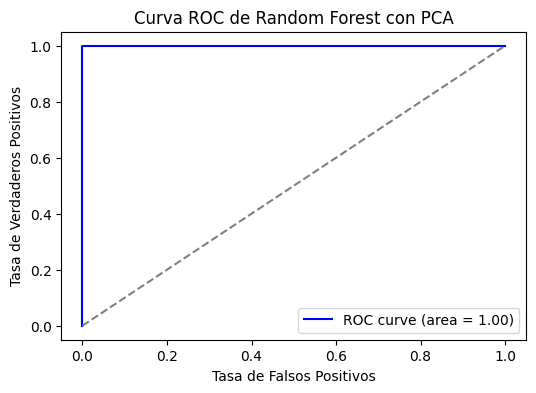

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# PREPARACIÓN DE LOS DATOS
# Separación de variables
X_12 = df_prueba[top_12_caracteristicas] # Características
Y = df_prueba['dementia'] # Etiqueta de salida

# División de los datos en conjuntos de entrenamiento y prueba
X_train_12, X_test_12, Y_train, Y_test = train_test_split(X_12, Y, test_size=0.2, random_state=42)

# Escalado de características
escalador = StandardScaler()
X_train_12 = escalador.fit_transform(X_train_12)
X_test_12 = escalador.transform(X_test_12)

# BOSQUE ALEATORIO
rdm_clf = RandomForestClassifier()

# Configuración de parámetros para el GridSearch
parametros_modelo_rdm_clf = {
    'n_estimators': [5, 10, 20, 50],
    'criterion' : ['gini', 'entropy'],
    'max_leaf_nodes' : [4, 8, 16],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight' : ['balanced', 'balanced_subsample']
}

# Búsqueda de hiperparámetros con Validación Cruzada
modelo_rdm_clf_12 = GridSearchCV(rdm_clf, parametros_modelo_rdm_clf, refit=True, cv=5, scoring='roc_auc')

# Ajuste del modelo con el conjunto de entrenamiento
modelo_rdm_clf_12.fit(X_train_12, Y_train)
print("Mejor hiperparámetro encontrado: ", modelo_rdm_clf_12.best_params_)


# EVALUACIÓN DEL MODELO
# Predicción sobre el conjunto de prueba
Y_prediccion_rdm_clf_12 = modelo_rdm_clf_12.predict(X_test_12)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_rdm_clf_12))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_rdm_clf_12))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_rdm_clf_12))


# VISUALIZACIÓN
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_rdm_clf_12 = modelo_rdm_clf_12.predict_proba(X_test_12)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_rdm_clf_12)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Random Forest con PCA")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_sin_demencia_12_escalada = escalador.transform(instancia_sin_demencia_12)
instancia_con_demencia_12_escalada = escalador.transform(instancia_con_demencia_12)

# Clasificación
clasificacion0_rdm_clf_12 = modelo_rdm_clf_12.predict(instancia_sin_demencia_12_escalada)
print("Predicción de instancia 'sin demencia':", clasificacion0_rdm_clf_12)

clasificacion1_rdm_clf_12 = modelo_rdm_clf_12.predict(instancia_con_demencia_12_escalada)
print("Predicción de instancia 'con demencia':", clasificacion1_rdm_clf_12)

### Matriz de comparación entre modelos de Random Forest

In [ ]:
matriz_rf = pd.DataFrame([[accuracy_score(Y_test, Y_prediccion_rdm_clf), precision_score(Y_test, Y_prediccion_rdm_clf), recall_score(Y_test, Y_prediccion_rdm_clf), f1_score(Y_test, Y_prediccion_rdm_clf), roc_auc_score(Y_test, Y_prediccion_rdm_clf), clasificacion0_rdm_clf[0]], 
                          [accuracy_score(Y_test, Y_prediccion_rdm_clf_pca), precision_score(Y_test, Y_prediccion_rdm_clf_pca), recall_score(Y_test, Y_prediccion_rdm_clf_pca), f1_score(Y_test, Y_prediccion_rdm_clf_pca), roc_auc_score(Y_test, Y_prediccion_rdm_clf_pca), clasificacion0_rdm_clf_pca[0]],
                          [accuracy_score(Y_test, Y_prediccion_rdm_clf_12), precision_score(Y_test, Y_prediccion_rdm_clf_12), recall_score(Y_test, Y_prediccion_rdm_clf_12), f1_score(Y_test, Y_prediccion_rdm_clf_12), roc_auc_score(Y_test, Y_prediccion_rdm_clf_12), clasificacion0_rdm_clf_12[0]]], 
                          columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Curva ROC', 'Clasificación'], index=['Random Forest', 'Random Forest PCA', 'Random Forest Importancia de Características'])
print(matriz_rf)

                                              Accuracy  Precision    Recall  \
Random Forest                                    0.975   1.000000  0.952830   
Random Forest PCA                                0.925   0.959596  0.896226   
Random Forest Importancia de Características     1.000   1.000000  1.000000   

                                              F1 score  Curva ROC  \
Random Forest                                 0.975845   0.976415   
Random Forest PCA                             0.926829   0.926837   
Random Forest Importancia de Características  1.000000   1.000000   

                                              Clasificación  
Random Forest                                             0  
Random Forest PCA                                         0  
Random Forest Importancia de Características              0  


Basandonos en los resultados de las métricas, concluimos que el mejor modelo es el de Random Forest aplicando importancia de características

## Máquinas de Soporte Vectorial (SVM)

- Es efectivo en espacios de alta dimensionalidad
- Requiere de escalado de los datos

### Preparación de los datos

In [ ]:
# Separación de variables
X = df_prueba.drop(columns=['dementia', 'prescription', 'dosage_in_mg']) # Características (eliminamos los atributos que no interesa evaluar)
Y = df_prueba['dementia'] # Etiqueta de salida

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalado de características
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

### SVM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mejor hiperparámetro encontrado:  {'C': 100, 'gamma': 0.001}
Matriz de confusión:
 [[ 94   0]
 [  3 103]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

Exactitud del modelo:  0.985


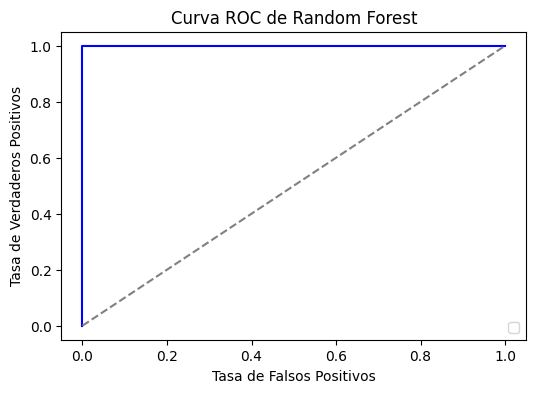

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# SVM
svc = SVC(kernel='rbf', probability=True) # Se utiliza kernel RBF porque los datos no son linealmente separables

# Configuración de parámetros para el GridSearch
parametros_modelo_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Búsqueda de hiperparámetros con Validación Cruzada
modelo_svc = GridSearchCV(svc, parametros_modelo_svc, refit=True, cv=5, scoring='accuracy')

# Ajuste del modelo con el conjunto de entrenamiento
modelo_svc.fit(X_train, Y_train)
print("Mejor hiperparámetro encontrado: ", modelo_svc.best_params_)


# EVALUACIÓN DEL MODELO
# Predicción sobre el conjunto de prueba
Y_prediccion_svc = modelo_svc.predict(X_test)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_svc))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_svc))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_svc))


# VISUALIZACIÓN
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_svm = modelo_svc.predict_proba(X_test)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_svm)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Random Forest")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_con_demencia_escalada = escalador.transform(instancia_con_demencia)
instancia_sin_demencia_escalada = escalador.transform(instancia_sin_demencia)

# Clasificación
clasificacion0_svm = modelo_svc.predict(instancia_sin_demencia_escalada)
print("Predicción de instancia 'sin demencia':", clasificacion0_svm)

clasificacion1_svm = modelo_svc.predict(instancia_con_demencia_escalada)
print("Predicción de instancia 'con demencia':", clasificacion1_svm)

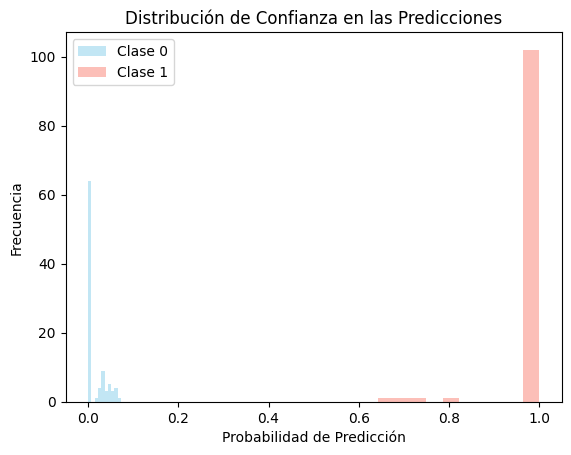

In [ ]:
# Calcular las probabilidades de predicción
Y_pred_prob = modelo_svc.predict_proba(X_test)

# Separar las probabilidades de cada clase
plt.hist(Y_pred_prob[Y_test == 0, 1], bins=10, alpha=0.5, label="Clase 0", color="skyblue")
plt.hist(Y_pred_prob[Y_test == 1, 1], bins=10, alpha=0.5, label="Clase 1", color="salmon")
plt.xlabel("Probabilidad de Predicción")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de Confianza en las Predicciones")
plt.show()

En el gráfico de distribución de confianza en las predicciones, se observa una buena separación entre las dos distribuciones, lo que indica que el modelo sabe diferenciar entre las clases.

### SVM aplicando PCA

Matriz de confusión:
 [[92  2]
 [12 94]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        94
           1       0.98      0.89      0.93       106

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Exactitud del modelo:  0.93


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


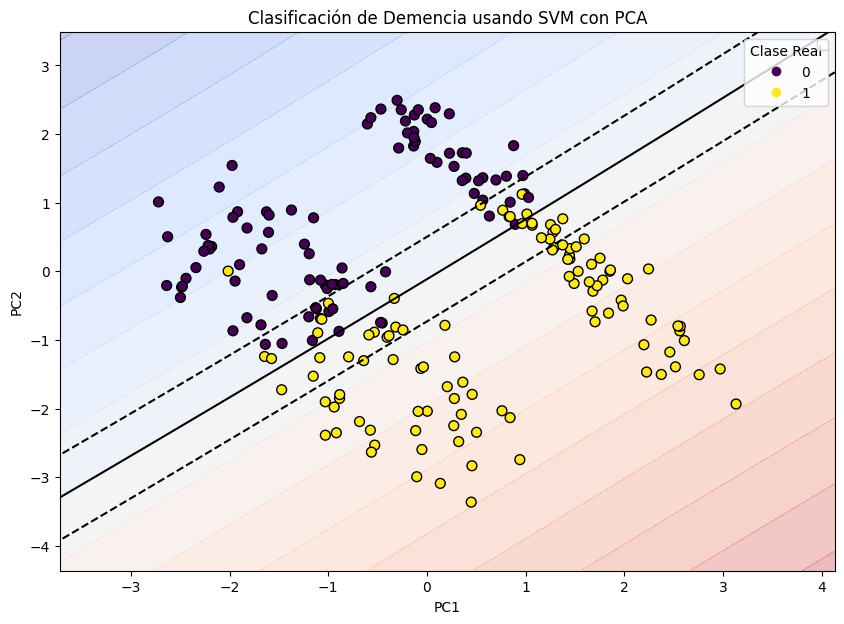

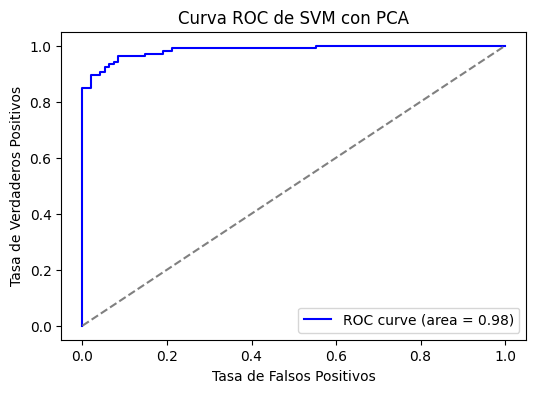

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Aplicación de PCA a las características de los conjuntos (de entrenamiento y prueba)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenamiento de SVM con PCA(con los mejores hiperparámetros encontrados anteriormente)
modelo_svc_pca = SVC(kernel='rbf', C=modelo_svc.best_params_['C'], gamma=modelo_svc.best_params_['gamma'], probability=True)
modelo_svc_pca.fit(X_train_pca, Y_train)


# EVALUACIÓN DEL MODELO
# Predicción sobre el conjunto de prueba en el espacio PCA
Y_prediccion_svc_pca = modelo_svc_pca.predict(X_test_pca)

# Evaluación del rendimiento del modelo con PCA
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_svc_pca))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_svc_pca))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_svc_pca))


# VISUALIZACIÓN
# Generación del plano de decisión y márgenes
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = modelo_svc_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figura
plt.figure(figsize=(10, 7))

# Plano de decisión y márgenes
contour = plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

# Puntos de prueba con sus predicciones
scatter = plt.scatter(
    X_test_pca[:, 0], 
    X_test_pca[:, 1], 
    c=Y_test,
    cmap='viridis', 
    edgecolor='k', 
    s=50
)

# Etiquetas de los ejes
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Clasificación de Demencia usando SVM con PCA")

# Referencias
legend1 = plt.legend(*scatter.legend_elements(), title="Clase Real")
plt.gca().add_artist(legend1)
plt.legend()

plt.show()

# CURVA ROC
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_svm_pca = modelo_svc_pca.predict_proba(X_test_pca)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_svm_pca)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de SVM con PCA")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_con_demencia_escalada = escalador.transform(instancia_con_demencia)
instancia_sin_demencia_escalada = escalador.transform(instancia_sin_demencia)

# Reducción de las instancias con PCA
instancia_sin_demencia_pca = pca.transform(instancia_sin_demencia_escalada)
instancia_con_demencia_pca = pca.transform(instancia_con_demencia_escalada)

# Clasificación
clasificacion0_svm_pca = modelo_svc_pca.predict(instancia_sin_demencia_pca)
print("Predicción de instancia 'sin demencia':", clasificacion0_svm_pca)

clasificacion1_svm_pca = modelo_svc_pca.predict(instancia_con_demencia_pca)
print("Predicción de instancia 'con demencia':", clasificacion1_svm_pca)

### SVM aplicando importancia de características

Mejor hiperparámetro encontrado:  {'C': 100, 'gamma': 0.01}
Matriz de confusión:
 [[ 94   0]
 [  0 106]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Exactitud del modelo:  1.0


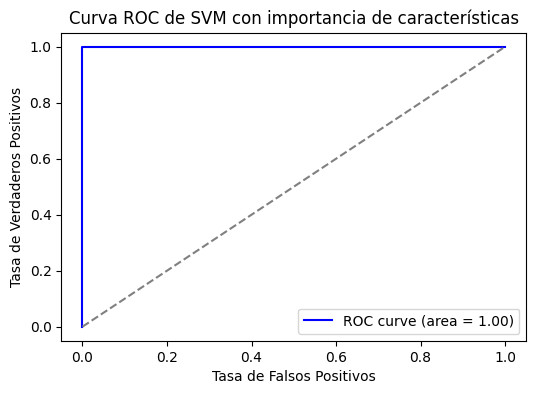

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# PREPARACIÓN DE LOS DATOS
# Separación de variables
X_12 = df_prueba[top_12_caracteristicas] # Características
Y = df_prueba['dementia'] # Etiqueta de salida

# División de los datos en conjuntos de entrenamiento y prueba
X_train_12, X_test_12, Y_train, Y_test = train_test_split(X_12, Y, test_size=0.2, random_state=42)

# Escalado de características
escalador = StandardScaler()
X_train_12 = escalador.fit_transform(X_train_12)
X_test_12 = escalador.transform(X_test_12)

# SVM
svc = SVC(kernel='rbf', probability=True) # Se utiliza kernel RBF porque los datos no son linealmente separables

# Configuración de parámetros para el GridSearch
parametros_modelo_svc_12 = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Búsqueda de hiperparámetros con Validación Cruzada
modelo_svc_12 = GridSearchCV(svc, parametros_modelo_svc_12, refit=True, cv=5, scoring='accuracy')

# Ajuste del modelo con el conjunto de entrenamiento
modelo_svc_12.fit(X_train_12, Y_train)
print("Mejor hiperparámetro encontrado: ", modelo_svc_12.best_params_)


# EVALUACIÓN DEL MODELO
# Predicción sobre el conjunto de prueba
Y_prediccion_svc_12 = modelo_svc_12.predict(X_test_12)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_svc_12))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_svc_12))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_svc_12))


# VISUALIZACIÓN
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_svm_12 = modelo_svc_12.predict_proba(X_test_12)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_svm_12)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de SVM con importancia de características")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_sin_demencia_12_escalada = escalador.transform(instancia_sin_demencia_12)
instancia_con_demencia_12_escalada = escalador.transform(instancia_con_demencia_12)

# Clasificación
clasificacion0_svm_12 = modelo_svc_12.predict(instancia_sin_demencia_12_escalada)
print("Predicción de instancia 'sin demencia':", clasificacion0_svm_12)

clasificacion1_svm_12 = modelo_svc_12.predict(instancia_con_demencia_12_escalada)
print("Predicción de instancia 'con demencia':", clasificacion1_svm_12)

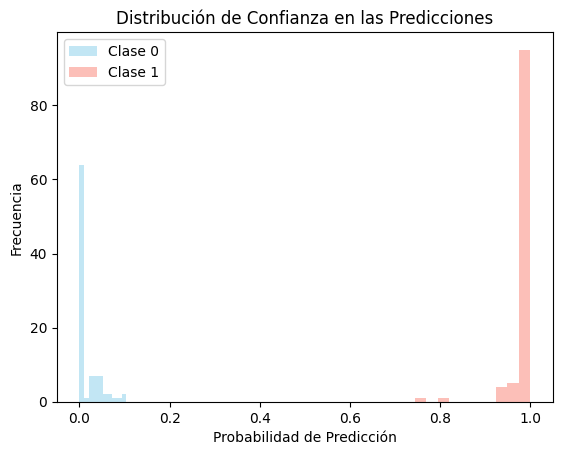

In [ ]:
# Calcular las probabilidades de predicción
Y_pred_prob = modelo_svc_12.predict_proba(X_test_12)

# Separar las probabilidades de cada clase
plt.hist(Y_pred_prob[Y_test == 0, 1], bins=10, alpha=0.5, label="Clase 0", color="skyblue")
plt.hist(Y_pred_prob[Y_test == 1, 1], bins=10, alpha=0.5, label="Clase 1", color="salmon")
plt.xlabel("Probabilidad de Predicción")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de Confianza en las Predicciones")
plt.show()
#Gráfico de Distribución de Confianza
#Este gráfico muestra las probabilidades de predicción (niveles de confianza) para cada clase. Permite identificar si el modelo tiene alta o baja confianza en sus predicciones.

En el gráfico de distribución de confianza en las predicciones, se observa una buena separación entre las dos distribuciones, lo que indica que el modelo sabe diferenciar entre las clases.

### Matriz de comparación entre modelos de SVM

In [ ]:
matriz_svm = pd.DataFrame([[accuracy_score(Y_test, Y_prediccion_svc), precision_score(Y_test, Y_prediccion_svc), recall_score(Y_test, Y_prediccion_svc), f1_score(Y_test, Y_prediccion_svc), roc_auc_score(Y_test, Y_prediccion_svc), clasificacion0_svm[0]], 
                           [accuracy_score(Y_test, Y_prediccion_svc_pca), precision_score(Y_test, Y_prediccion_svc_pca), recall_score(Y_test, Y_prediccion_svc_pca), f1_score(Y_test, Y_prediccion_svc_pca), roc_auc_score(Y_test, Y_prediccion_svc_pca), clasificacion0_svm_pca[0]],
                           [accuracy_score(Y_test, Y_prediccion_svc_12), precision_score(Y_test, Y_prediccion_svc_12), recall_score(Y_test, Y_prediccion_svc_12), f1_score(Y_test, Y_prediccion_svc_12), roc_auc_score(Y_test, Y_prediccion_svc_12), clasificacion0_svm_12[0]]], 
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Curva ROC', 'Clasificación'], index=['SVM', 'SVM con PCA', 'SVM Importancia de Características'])
print(matriz_svm)

                                    Accuracy  Precision    Recall  F1 score  \
SVM                                    0.985   1.000000  0.971698  0.985646   
SVM con PCA                            0.930   0.979167  0.886792  0.930693   
SVM Importancia de Características     1.000   1.000000  1.000000  1.000000   

                                    Curva ROC  Clasificación  
SVM                                  0.985849              0  
SVM con PCA                          0.932758              0  
SVM Importancia de Características   1.000000              0  


Observando las métricas, el mejor modelo es el de SVM aplicando importancia de características

## Regresión Logística
- Requiere análisis de componentes principales (PCA)

### Preparación de los datos

In [ ]:
# Separación de variables
X = df_prueba.drop(columns=['dementia', 'prescription', 'dosage_in_mg'])  # Características
Y = df_prueba['dementia']  # Etiqueta de salida

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalado de características
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

### Comparación de 3 formas de Regresión Logística

In [ ]:
# LOGISTICREGRESSION Y GRIDSEARCHCV
# Configuración de parámetros para el GridSearch con regularización Lasso (L1). 'saga' permite el uso de L1
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['saga'],
}

# Búsqueda de hiperparámetros con Validación Cruzada
grid_search = GridSearchCV(
    LogisticRegression(max_iter=10),
    param_grid,
    scoring='accuracy',
    cv=5,
    refit=True
)

# Ajuste del modelo con el conjunto de entrenamiento
grid_search.fit(X_train, Y_train)

# Predicción sobre el conjunto de prueba
Y_prediccion_reg_log_1 = grid_search.predict(X_test)


#LOGISTICREGRESSIONCV
# Configuración de parámetros para LogisticRegressionCV con regularización Lasso (L1)
reglog_cv = LogisticRegressionCV(
    Cs=[0.1, 1, 10, 100],
    cv=5,
    penalty='l1',               # Regularización Lasso
    solver='saga',              # 'saga' permite el uso de L1
    scoring='accuracy',
    max_iter=10                 # Con número de iteraciones 100 y 1000, la exactitud = 1.0
)

# Ajuste del modelo con el conjunto de entrenamiento
reglog_cv.fit(X_train, Y_train)

# Predicción sobre el conjunto de prueba
Y_prediccion_reg_log_2 = reglog_cv.predict(X_test)



# LOGISTICREGRESSION SIN VALIDACIÓN CRUZADA (CON HIPERPARÁMETROS POR DEFECTO)
# Modelo
reglog = LogisticRegression()

reglog.fit(X_train, Y_train)

Y_prediccion_reg_log_3 = reglog.predict(X_test)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: Convergen

### Matriz de comparación entre modelos

In [ ]:
matriz_log_reg = pd.DataFrame([[accuracy_score(Y_test, Y_prediccion_reg_log_1), precision_score(Y_test, Y_prediccion_reg_log_1), recall_score(Y_test, Y_prediccion_reg_log_1), f1_score(Y_test, Y_prediccion_reg_log_1), roc_auc_score(Y_test, Y_prediccion_reg_log_1)], 
                               [accuracy_score(Y_test, Y_prediccion_reg_log_2), precision_score(Y_test, Y_prediccion_reg_log_2), recall_score(Y_test, Y_prediccion_reg_log_2), f1_score(Y_test, Y_prediccion_reg_log_2), roc_auc_score(Y_test, Y_prediccion_reg_log_2)], 
                               [accuracy_score(Y_test, Y_prediccion_reg_log_3), precision_score(Y_test, Y_prediccion_reg_log_3), recall_score(Y_test, Y_prediccion_reg_log_3), f1_score(Y_test, Y_prediccion_reg_log_3), roc_auc_score(Y_test, Y_prediccion_reg_log_3)]], columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Curva ROC',], index=['Regresión Logística 1', 'Regresión Logística 2', 'Regresión Logística 3'])
print(matriz_log_reg)

                       Accuracy  Precision    Recall  F1 score  Curva ROC
Regresión Logística 1     0.980        1.0  0.962264  0.980769   0.981132
Regresión Logística 2     0.985        1.0  0.971698  0.985646   0.985849
Regresión Logística 3     0.980        1.0  0.962264  0.980769   0.981132


Analizando las métricas, el mejor modelo es utilizando la clase 'LogisticRegressionCV'

### Regresión Logística ('LogisticRegressionCV')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Matriz de confusión:
 [[ 94   0]
 [  3 103]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

Exactitud del modelo:  0.985


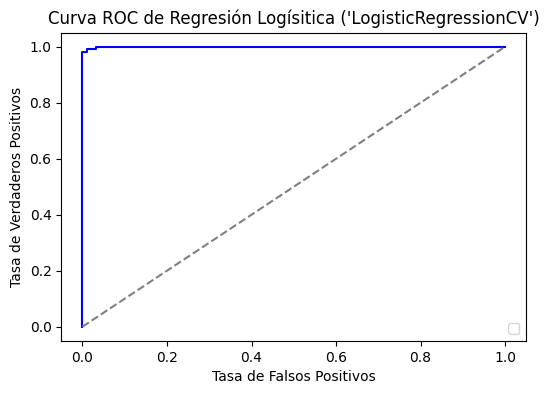

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# EVALUACIÓN DEL MODELO
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_reg_log_2))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_reg_log_2))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_reg_log_2))


# VISUALIZACIÓN
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_reg_log = reglog_cv.predict_proba(X_test)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_reg_log)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Regresión Logísitica ('LogisticRegressionCV')")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_con_demencia_escalada = escalador.transform(instancia_con_demencia)
instancia_sin_demencia_escalada = escalador.transform(instancia_sin_demencia)

# Clasificación
clasificacion0_reg_log = reglog_cv.predict(instancia_sin_demencia_escalada)
print("Predicción de instancia 'sin demencia':", clasificacion0_reg_log)

clasificacion1_reg_log = reglog_cv.predict(instancia_con_demencia_escalada)
print("Predicción de instancia 'con demencia':", clasificacion1_reg_log)


### Regresión Logísitca aplicando PCA

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: Convergen

Matriz de confusión:
 [[89  5]
 [11 95]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        94
           1       0.95      0.90      0.92       106

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Exactitud del modelo:  0.92


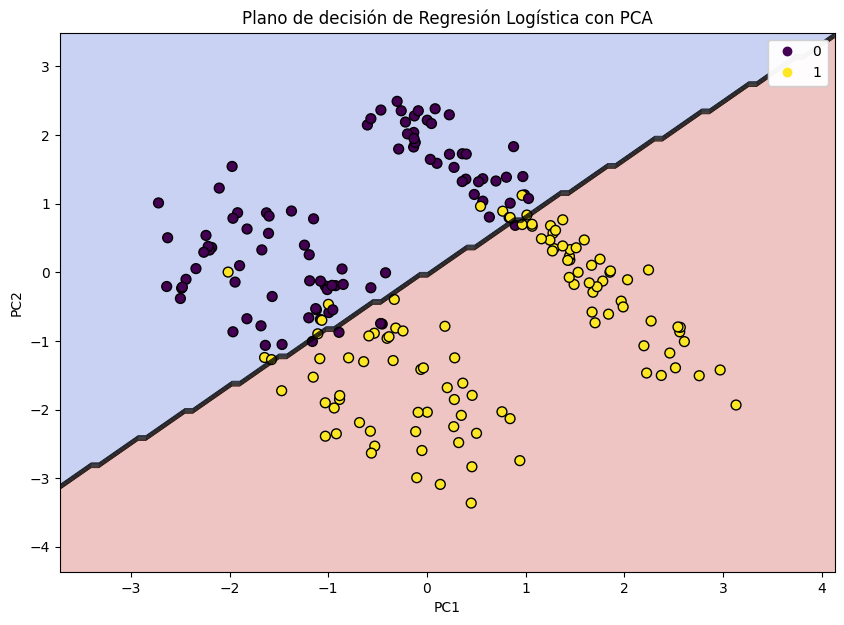

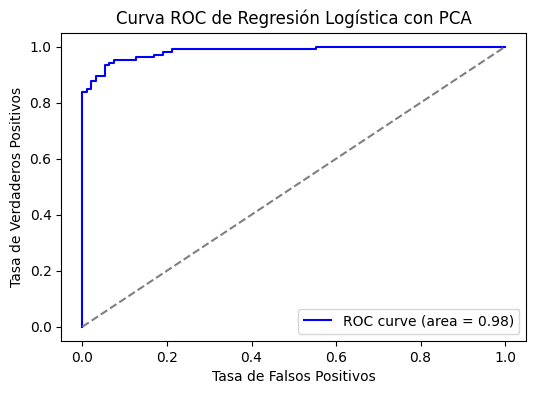

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Aplicación de PCA a las características de los conjuntos (de entrenamiento y prueba)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Configuración de parámetros para LogisticRegressionCV con regularización Lasso (L1)
modelo_reg_log_pca = LogisticRegressionCV(
    Cs=[0.1, 1, 10, 100],
    cv=5,
    penalty='l1',
    solver='saga',
    scoring='accuracy',
    max_iter=10
)

# Ajuste del modelo con el conjunto de entrenamiento reducido por PCA
modelo_reg_log_pca.fit(X_train_pca, Y_train)


# EVALUACIÓN DEL MODELO
Y_prediccion_reg_log_pca = modelo_reg_log_pca.predict(X_test_pca)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_reg_log_pca))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_reg_log_pca))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_reg_log_pca))


# VISUALIZACIÓN
# Grid de valores para el plano de decisión
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predicciones para cada punto en el grid
Z = modelo_reg_log_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figura
plt.figure(figsize=(10, 7))

# Grafico del plano de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)

# Grafico de los puntos de prueba con sus clases reales
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='viridis', edgecolor='k', s=50)

# Etiquetas de los ejes
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plano de decisión de Regresión Logística con PCA')

# Leyenda para las clases reales
legend1 = plt.legend(*scatter.legend_elements())
plt.gca().add_artist(legend1)

plt.show()

# CURVA ROC
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_reg_log_pca = modelo_reg_log_pca.predict_proba(X_test_pca)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_reg_log_pca)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Regresión Logística con PCA")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_con_demencia_escalada = escalador.transform(instancia_con_demencia)
instancia_sin_demencia_escalada = escalador.transform(instancia_sin_demencia)

# Reducción de las instancias con PCA
instancia_con_demencia_pca = pca.transform(instancia_con_demencia_escalada)
instancia_sin_demencia_pca = pca.transform(instancia_sin_demencia_escalada)

# Clasificación
clasificacion0_reg_log_pca = modelo_reg_log_pca.predict(instancia_sin_demencia_pca)
print("Predicción de instancia 'sin demencia':", clasificacion0_reg_log_pca)

clasificacion1_reg_log_pca = modelo_reg_log_pca.predict(instancia_con_demencia_pca)
print("Predicción de instancia 'con demencia':", clasificacion1_reg_log_pca)

### Regresión Logística aplicando importancia de características

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: Convergen

Matriz de confusión:
 [[ 94   0]
 [  2 104]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        94
           1       1.00      0.98      0.99       106

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Exactitud del modelo:  0.99


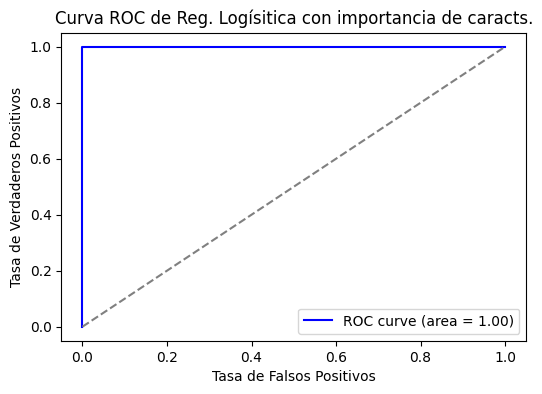

Predicción de instancia 'sin demencia': [0]
Predicción de instancia 'con demencia': [1]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# PREPARACIÓN DE LOS DATOS
# Separación de variables
X_12 = df_prueba[top_12_caracteristicas] # Características
Y = df_prueba['dementia'] # Etiqueta de salida

# División de los datos en conjuntos de entrenamiento y prueba
X_train_12, X_test_12, Y_train, Y_test = train_test_split(X_12, Y, test_size=0.2, random_state=42)

# Escalado de características
escalador = StandardScaler()
X_train_12 = escalador.fit_transform(X_train_12)
X_test_12 = escalador.transform(X_test_12)

# REGRESIÓN LOGÍSTICA
modelo_reg_log_12 = LogisticRegressionCV(
    Cs=[0.1, 1, 10, 100],
    cv=5,
    penalty='l1',
    solver='saga',
    scoring='accuracy',
    max_iter=10
)

# Ajuste del modelo
modelo_reg_log_12.fit(X_train_12, Y_train)


# EVALUACIÓN DEL MODELO
# Predicción sobre el conjunto de prueba
Y_prediccion_reg_log_12 = modelo_reg_log_12.predict(X_test_12)

# Evaluación del rendimiento del modelo
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_prediccion_reg_log_12))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_prediccion_reg_log_12))
print("Exactitud del modelo: ", accuracy_score(Y_test, Y_prediccion_reg_log_12))


# VISUALIZACIÓN
# Probabilidades de predicción para los casos con demencia
Y_pred_prob_reg_log_12 = modelo_reg_log_12.predict_proba(X_test_12)[:, 1]

# Valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob_reg_log_12)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC de Reg. Logísitica con importancia de caracts.")
plt.legend(loc="lower right")
plt.show()


# PRUEBA DE CLASIFICACIÓN
# Escalado de las instancias
instancia_sin_demencia_12_escalada = escalador.transform(instancia_sin_demencia_12)
instancia_con_demencia_12_escalada = escalador.transform(instancia_con_demencia_12)

# Clasificación
clasificacion0_reg_log_12 = modelo_reg_log_12.predict(instancia_sin_demencia_12_escalada)
print("Predicción de instancia 'sin demencia':", clasificacion0_reg_log_12)

clasificacion1_reg_log_12 = modelo_reg_log_12.predict(instancia_con_demencia_12_escalada)
print("Predicción de instancia 'con demencia':", clasificacion1_reg_log_12)

### Matriz de comparación entre modelos de Regresión Logística

In [ ]:
matriz_reglog = pd.DataFrame([[accuracy_score(Y_test, Y_prediccion_reg_log_2), precision_score(Y_test, Y_prediccion_reg_log_2), recall_score(Y_test, Y_prediccion_reg_log_2), f1_score(Y_test, Y_prediccion_reg_log_2), roc_auc_score(Y_test, Y_prediccion_reg_log_2), clasificacion0_reg_log[0]], 
                                   [accuracy_score(Y_test, Y_prediccion_reg_log_pca), precision_score(Y_test, Y_prediccion_reg_log_pca), recall_score(Y_test, Y_prediccion_reg_log_pca), f1_score(Y_test, Y_prediccion_reg_log_pca), roc_auc_score(Y_test, Y_prediccion_reg_log_pca), clasificacion0_reg_log_pca[0]],
                                   [accuracy_score(Y_test, Y_prediccion_reg_log_12), precision_score(Y_test, Y_prediccion_reg_log_12), recall_score(Y_test, Y_prediccion_reg_log_12), f1_score(Y_test, Y_prediccion_reg_log_12), roc_auc_score(Y_test, Y_prediccion_reg_log_12), clasificacion0_reg_log_12[0]]], 
                                   columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Curva ROC', 'Clasificación'], index=['Regresión Logísitca', 'Regresión Logística PCA', 'Regresión Logísitca Importancia de Características'])
print(matriz_reglog)

                                                    Accuracy  Precision  \
Regresión Logísitca                                    0.985       1.00   
Regresión Logística PCA                                0.920       0.95   
Regresión Logísitca Importancia de Características     0.990       1.00   

                                                      Recall  F1 score  \
Regresión Logísitca                                 0.971698  0.985646   
Regresión Logística PCA                             0.896226  0.922330   
Regresión Logísitca Importancia de Características  0.981132  0.990476   

                                                    Curva ROC  Clasificación  
Regresión Logísitca                                  0.985849              0  
Regresión Logística PCA                              0.921517              0  
Regresión Logísitca Importancia de Características   0.990566              0  


Observando las métricas, concluimos que el mejor modelo es el de Regresión Logísitca aplicando importancia de características

## Evaluación de Métricas

In [ ]:
matriz = pd.DataFrame([[accuracy_score(Y_test, Y_prediccion_rdm_clf), precision_score(Y_test, Y_prediccion_rdm_clf), recall_score(Y_test, Y_prediccion_rdm_clf), f1_score(Y_test, Y_prediccion_rdm_clf), roc_auc_score(Y_test, Y_prediccion_rdm_clf), clasificacion0_rdm_clf[0]], 
                       [accuracy_score(Y_test, Y_prediccion_svc), precision_score(Y_test, Y_prediccion_svc), recall_score(Y_test, Y_prediccion_svc), f1_score(Y_test, Y_prediccion_svc), roc_auc_score(Y_test, Y_prediccion_svc), clasificacion0_svm[0]], 
                       [accuracy_score(Y_test, Y_prediccion_reg_log_2), precision_score(Y_test, Y_prediccion_reg_log_2), recall_score(Y_test, Y_prediccion_reg_log_2), f1_score(Y_test, Y_prediccion_reg_log_2), roc_auc_score(Y_test, Y_prediccion_reg_log_2), clasificacion0_reg_log[0]]], 
                       columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Curva ROC', 'Clasificación'], index=['Random Forest', 'SVC', 'Regresión Logística'])
print(matriz)

                     Accuracy  Precision    Recall  F1 score  Curva ROC  \
Random Forest           0.975        1.0  0.952830  0.975845   0.976415   
SVC                     0.985        1.0  0.971698  0.985646   0.985849   
Regresión Logística     0.985        1.0  0.971698  0.985646   0.985849   

                     Clasificación  
Random Forest                    0  
SVC                              0  
Regresión Logística              0  


Al comparar las métricas de los modelos con el total de características de cada algoritmo, concluímos tanto Máquinas de Soporte Vectorial como Regresión Logística tienen un mejor rendimiento para clasificar a pacientes con y sin demencia.

# Análisis a partir de las preguntas planteadas

In [ ]:
import pandas as pd
import sklearn

# Cargar el conjunto de datos y analizar las columnas
csv_file = 'C:/Users/adryf/Documents/UNRaf/Aprendizaje Automatico y Grandes Datos/dementia_patients_health_data.csv'
data = pd.read_csv(csv_file)

# Mostrar las primeras filas y un resumen de la información
data.head(), data.info()

# Revisar valores faltantes en cada columna para entender la calidad de los datos
missing_values = data.isnull().sum()

# Mostrar las columnas con los valores faltantes y el total
missing_values[missing_values > 0]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Lista de columnas a escala (datos numéricos)
numeric_features = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 
                    'BodyTemperature', 'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores']

# Lista de columnas categóricas para codificar
categorical_features = ['Education_Level', 'Dominant_Hand', 'Gender', 'Family_History', 'Smoking_Status',
                        'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 
                        'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']

# Definir el pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Ajustar y transformar el conjunto de datos
processed_data = preprocessor.fit_transform(data)

# Convertir los datos procesados nuevamente en un DataFrame para facilitar el manejo y la inspección
# Extraer nombres de características de los transformadores para el codificador categórico
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
processed_columns = numeric_features + list(encoded_feature_names)

processed_df = pd.DataFrame(processed_data, columns=processed_columns)

# Mostrar una visión general de los datos procesados
processed_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Cognitive_Test_Scores,Education_Level_No School,Education_Level_Primary School,...,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Depression_Status_Yes,Medication_History_Yes,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Poor,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_nan
0,-0.229285,1.538404,0.343156,-1.243754,-1.159154,0.374840,-1.639950,1.137764,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.388015,-0.114283,-0.749344,-1.338723,-1.209764,0.062542,-1.529946,-1.693277,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-1.523866,0.794695,-0.566824,1.308986,-1.007314,0.447193,-0.649908,0.508644,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,-0.204344,-1.601702,-0.450694,0.623677,-1.110561,1.220526,0.340135,-0.435037,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.891495,-1.023262,0.779747,-1.620896,-0.457668,-0.136051,0.230130,-2.007837,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Definir las características de entrada (X) y la variable objetivo (y - Edad)
# Aquí excluimos la columna 'Age' y usamos todas las demás como predictores para esta regresión
X = processed_df.drop(columns=['Age'])
y = processed_df['Age']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión con Bosques Aleatorios
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Evaluar el desempeño del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2



(np.float64(0.9140787213999733), -0.020241952119135265)

In [ ]:
# Analizar relaciones y estadísticas descriptivas relevantes para cada pregunta

# Resumir datos para los grupos de Demencia y No Demencia
dementia_groups = data.groupby('Dementia')

# 1. Relación entre MRI_Delay y Demencia
mri_delay_stats = dementia_groups['MRI_Delay'].describe()

# 2. Diferencias entre pacientes con y sin Demencia
dementia_diff_stats = dementia_groups.describe().transpose()

# 3. Diferencias de género dentro de los grupos de Demencia y No Demencia
gender_dementia_counts = data.groupby(['Gender', 'Dementia']).size().unstack()

# 4. Asociación del genotipo APOE_ε4 con la presencia de Demencia
apoe_dementia_counts = data.groupby(['APOE_ε4', 'Dementia']).size().unstack()

# 5. Relación entre Historia Familiar y Demencia
family_history_dementia_counts = data.groupby(['Family_History', 'Dementia']).size().unstack()

# 6. Factores de estilo de vida y su incidencia en la presencia de Demencia
# Resumen de los factores de estilo de vida según el estado de demencia
lifestyle_factors = ['Smoking_Status', 'Physical_Activity', 'Nutrition_Diet', 'Sleep_Quality']
lifestyle_dementia_counts = {factor: data.groupby([factor, 'Dementia']).size().unstack() for factor in lifestyle_factors}

# 7. Relación entre condiciones de salud crónicas y Demencia
chronic_conditions_dementia_counts = data.groupby(['Chronic_Health_Conditions', 'Dementia']).size().unstack()

# Mostrar los resultados
mri_delay_stats, dementia_diff_stats, gender_dementia_counts, apoe_dementia_counts, family_history_dementia_counts, lifestyle_dementia_counts, chronic_conditions_dementia_counts



(          count       mean        std       min        25%        50%  \
 Dementia                                                                
 0         515.0  29.592438  16.859067  0.094684  14.767530  28.807740   
 1         485.0  30.646313  16.865890  0.235997  17.141692  30.662281   
 
                 75%        max  
 Dementia                        
 0         43.990382  59.957599  
 1         44.231269  59.951588  ,
 Dementia                              0           1
 Diabetic              count  515.000000  485.000000
                       mean     0.491262    0.536082
                       std      0.500410    0.499211
                       min      0.000000    0.000000
                       25%      0.000000    0.000000
 ...                                 ...         ...
 Cognitive_Test_Scores min      8.000000    0.000000
                       25%      8.000000    2.000000
                       50%      9.000000    4.000000
                       75%     10.0